In [19]:
# -----------------------------------------------
# 🧠 Libraries
# -----------------------------------------------
# Data handling
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Provided by Codecademy for boundary visualization (2D only)
from svm_visualization import draw_boundary


# Predicting Baseball Strike Zones with Support Vector Machines

## Project Overview
This project uses Support Vector Machines (SVMs) to predict whether a baseball pitch is a strike or ball based on its location. We'll analyze data from different players to see how their strike zones vary.

### Key Concepts:
- **Strike Zone**: The area over home plate where a pitch must pass to be called a strike
- **plate_x**: Horizontal position (left/right) relative to center of plate
- **plate_z**: Vertical position (height) from ground level
- **SVM**: A machine learning algorithm that finds optimal decision boundaries

### Project Steps:
1. **Data Exploration** (Steps 1-7): Load data, understand features, clean data
2. **Visualization** (Step 8): Plot pitch locations colored by strike/ball
3. **Model Building** (Steps 9-12): Create and train SVM, visualize decision boundary
4. **Model Optimization** (Steps 13-15): Evaluate accuracy, tune hyperparameters
5. **Extensions** (Steps 16-17): Compare players, add features

In [20]:
# -----------------------------------------------
# ✅ Step 1: Load the CSV and check column names
# -----------------------------------------------
aaron_judge = pd.read_csv(r"C:\Users\becas\OneDrive\Documents\predict-baseball-strike-zones-with-machine-learning\aaron_judge.csv")
# print(aaron_judge.columns)



In [21]:
# -----------------------------------------------
# ✅ Step 2: View unique pitch descriptions
# -----------------------------------------------
# print(aaron_judge['description'].unique())



In [22]:
# -----------------------------------------------
# ✅ Step 3: View pitch result types (S/B/X)
# -----------------------------------------------
# print(aaron_judge['type'].unique())



In [23]:
# -----------------------------------------------
# ✅ Step 4: Keep only balls and strikes; map to binary
# -----------------------------------------------
aaron_judge = aaron_judge[aaron_judge['type'].isin(['S', 'B'])]
aaron_judge['type'] = aaron_judge['type'].map({'S': 1, 'B': 0})



In [24]:
# -----------------------------------------------
# ✅ Step 5: Confirm label conversion worked
# -----------------------------------------------
# print(aaron_judge['type'].unique())  # Should be [1, 0]



In [25]:
# -----------------------------------------------
# ✅ Step 6: Explore plate_x (left/right)
# -----------------------------------------------
# print(aaron_judge['plate_x'])



In [26]:
# -----------------------------------------------
# ✅ Step 7: Drop rows with NaNs in key columns
# -----------------------------------------------
aaron_judge = aaron_judge.dropna(subset=['plate_x', 'plate_z', 'type'])



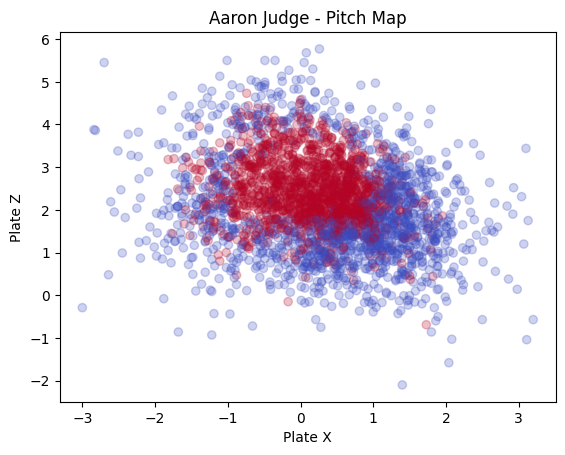

In [27]:
# -----------------------------------------------
# ✅ Step 8: Plot pitch locations (red=strike, blue=ball)
# -----------------------------------------------
plt.scatter(
    x=aaron_judge['plate_x'],
    y=aaron_judge['plate_z'],
    c=aaron_judge['type'],
    cmap=plt.cm.coolwarm,
    alpha=0.25
)
plt.xlabel('Plate X')
plt.ylabel('Plate Z')
plt.title("Aaron Judge - Pitch Map")
plt.show()



In [28]:
# -----------------------------------------------
# ✅ Step 9: Train/test split
# -----------------------------------------------
training_set, validation_set = train_test_split(aaron_judge, random_state=1)



In [29]:
# -----------------------------------------------
# ✅ Step 10: Initialize SVM with RBF kernel
# -----------------------------------------------
classifier = SVC(kernel='rbf')



In [30]:
# -----------------------------------------------
# ✅ Step 11: Train model on plate_x and plate_z
# -----------------------------------------------
X_train = training_set[['plate_x', 'plate_z']]
y_train = training_set['type']
classifier.fit(X_train, y_train)



SVC()

C:\Users\becas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


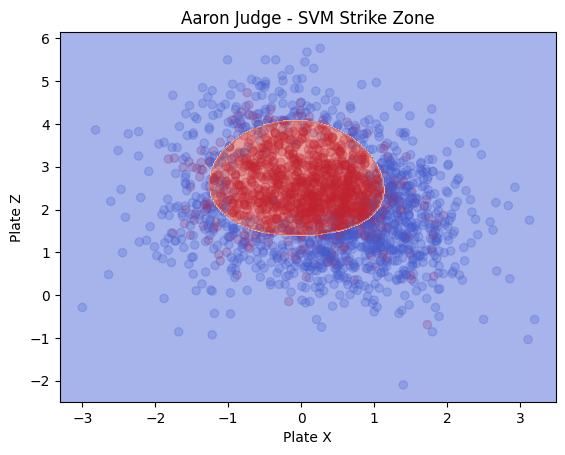

In [31]:
# -----------------------------------------------
# ✅ Step 12: Visualize strike zone with decision boundary
# -----------------------------------------------
fig, ax = plt.subplots()
ax.scatter(X_train['plate_x'], X_train['plate_z'], c=y_train, cmap=plt.cm.coolwarm, alpha=0.25)
draw_boundary(ax, classifier)
plt.xlabel('Plate X')
plt.ylabel('Plate Z')
plt.title("Aaron Judge - SVM Strike Zone")
plt.show()


In [32]:
# -----------------------------------------------
# ✅ Step 13: Evaluate model accuracy
# -----------------------------------------------
X_val = validation_set[['plate_x', 'plate_z']]
y_val = validation_set['type']
accuracy = classifier.score(X_val, y_val)
print("Validation Accuracy (default SVM):", accuracy)


Validation Accuracy (default SVM): 0.8335625859697386


C:\Users\becas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


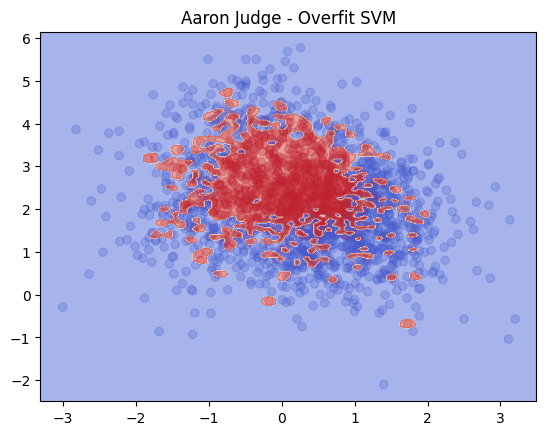

Validation Accuracy (overfit SVM): 0.7524071526822559


In [33]:

# -----------------------------------------------
# ✅ Step 14: Try overfitting with high gamma & C
# -----------------------------------------------
classifier = SVC(kernel='rbf', C=100, gamma=100)
classifier.fit(X_train, y_train)

fig, ax = plt.subplots()
ax.scatter(X_train['plate_x'], X_train['plate_z'], c=y_train, cmap=plt.cm.coolwarm, alpha=0.25)
draw_boundary(ax, classifier)
plt.title("Aaron Judge - Overfit SVM")
plt.show()

print("Validation Accuracy (overfit SVM):", classifier.score(X_val, y_val))


In [34]:
# -----------------------------------------------
# ✅ Step 15: Hyperparameter tuning with grid search
# -----------------------------------------------
best_score = 0
best_params = (None, None)

for gamma in [0.01, 0.1, 1, 10, 100]:
    for C in [0.01, 0.1, 1, 10, 100]:
        model = SVC(kernel='rbf', C=C, gamma=gamma)
        model.fit(X_train, y_train)
        score = model.score(X_val, y_val)
        if score > best_score:
            best_score = score
            best_params = (C, gamma)

print("Best Score from tuning:", best_score)
print("Best Parameters (C, gamma):", best_params)


Best Score from tuning: 0.8349381017881705
Best Parameters (C, gamma): (10, 0.1)


In [35]:
# -----------------------------------------------
# ✅ Step 16: Function to analyze any player's strike zone
# -----------------------------------------------
def analyze_strike_zone(player_data, player_name, C=10, gamma=0.1):
    """Analyze and visualize a player's strike zone using SVM"""
    
    # Filter to only balls and strikes, map to binary
    player_data = player_data[player_data['type'].isin(['S', 'B'])].copy()
    player_data['type'] = player_data['type'].map({'S': 1, 'B': 0})
    
    # Drop NaN values
    player_data = player_data.dropna(subset=['plate_x', 'plate_z', 'type'])
    
    # Split data
    training_set, validation_set = train_test_split(player_data, random_state=1)
    
    # Prepare features and labels
    X_train = training_set[['plate_x', 'plate_z']]
    y_train = training_set['type']
    X_val = validation_set[['plate_x', 'plate_z']]
    y_val = validation_set['type']
    
    # Train SVM
    classifier = SVC(kernel='rbf', C=C, gamma=gamma)
    classifier.fit(X_train, y_train)
    
    # Calculate accuracy
    accuracy = classifier.score(X_val, y_val)
    
    # Visualize
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(X_train['plate_x'], X_train['plate_z'], 
               c=y_train, cmap=plt.cm.coolwarm, alpha=0.25)
    draw_boundary(ax, classifier)
    
    # Standardize axes for comparison
    ax.set_xlim(-3, 3)
    ax.set_ylim(-2, 6)
    
    plt.xlabel('Plate X (feet)')
    plt.ylabel('Plate Z (feet)')
    plt.title(f"{player_name} - Strike Zone (Accuracy: {accuracy:.2%})")
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return classifier, accuracy

# Example usage (uncomment to run):
# jose_altuve = pd.read_csv("jose_altuve.csv")
# analyze_strike_zone(jose_altuve, "Jose Altuve")
# 
# david_ortiz = pd.read_csv("david_ortiz.csv")
# analyze_strike_zone(david_ortiz, "David Ortiz")

In [36]:
# -----------------------------------------------
# ✅ Step 17 (Optional): Try more features (e.g., strikes)
# NOTE: Comment out draw_boundary() if using more than 2 features
# -----------------------------------------------
# Example of using additional features:
# X_train_extra = training_set[['plate_x', 'plate_z', 'strikes']]
# X_val_extra = validation_set[['plate_x', 'plate_z', 'strikes']]
# 
# classifier_extra = SVC(kernel='rbf', C=10, gamma=0.1)
# classifier_extra.fit(X_train_extra, y_train)
# print("Accuracy with extra features:", classifier_extra.score(X_val_extra, y_val))